In [19]:
import pandas as pd
import numpy as np
import statistics
from statistics import median, mode, multimode
df=pd.read_csv("transactions_sample.csv")
df

,is_fraud,amount,hour,transaction_type,account_age,location_mismatch,previous_fraud_flag
0,0,23.39,21,payment,1626,0,0
1,1,20.24,1,cash_withdrawal,993,0,0
2,0,9.69,3,cash_withdrawal,1792,0,0
3,0,46.73,12,cash_withdrawal,929,0,0
4,0,32.37,12,cash_withdrawal,921,0,0
...,...,...,...,...,...,...,...
9995,0,104.79,12,transfer,10,0,0
9996,0,2.40,2,purchase,1669,0,0
9997,0,18.10,14,transfer,398,1,0
9998,0,29.29,14,payment,152,0,1


In [22]:
##primero empezamos importando pandas para poder trabajar con datos
import pandas as pd
#creamos una funcion que se llama carga para extraer los datos de exclusivamente archivos csv
def cargar(ruta):
    data = pd.read_csv(ruta, encoding = "utf-8" ,delimiter=",")
    return data
def Busqueda(dataframe, variable, valor):
    filtrado = dataframe.loc[dataframe[variable] >= valor]
    return filtrado
def insertar(dataframe, valor_insertar):
    nuevos_datos = pd.DataFrame([valor_insertar])
    return pd.concat([dataframe,nuevos_datos])
def eliminar(dataframe, variable, valor_a_eliminar):
    eliminacion = dataframe.drop(dataframe.loc[dataframe[variable] == valor_a_eliminar].index)
    return eliminacion
def analisis_estadistico_basico(dataframe):
    resultado = dataframe.describe()
    return resultado



In [17]:

diccionario= df.to_dict(orient='records')


for row in diccionario[:5]:
    print(row)

{'is_fraud': 0, 'amount': 23.39, 'hour': 21, 'transaction_type': 'payment', 'account_age': 1626, 'location_mismatch': 0, 'previous_fraud_flag': 0}
{'is_fraud': 1, 'amount': 20.24, 'hour': 1, 'transaction_type': 'cash_withdrawal', 'account_age': 993, 'location_mismatch': 0, 'previous_fraud_flag': 0}
{'is_fraud': 0, 'amount': 9.69, 'hour': 3, 'transaction_type': 'cash_withdrawal', 'account_age': 1792, 'location_mismatch': 0, 'previous_fraud_flag': 0}
{'is_fraud': 0, 'amount': 46.73, 'hour': 12, 'transaction_type': 'cash_withdrawal', 'account_age': 929, 'location_mismatch': 0, 'previous_fraud_flag': 0}
{'is_fraud': 0, 'amount': 32.37, 'hour': 12, 'transaction_type': 'cash_withdrawal', 'account_age': 921, 'location_mismatch': 0, 'previous_fraud_flag': 0}


In [12]:

df.describe()

,is_fraud,amount,hour,account_age,location_mismatch,previous_fraud_flag
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.047400,50.926571,11.613100,908.951500,0.019100,0.008900
std,0.212504,51.036311,6.886519,530.007751,0.136883,0.093924
min,0.000000,0.010000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,14.647500,6.000000,448.000000,0.000000,0.000000
50%,0.000000,35.250000,12.000000,905.000000,0.000000,0.000000
75%,0.000000,70.630000,18.000000,1373.000000,0.000000,0.000000
max,1.000000,474.790000,23.000000,1824.000000,1.000000,1.000000


In [ ]:



columns_of_interest = df[['is_fraud', 'amount', 'hour', 'transaction_type']]


results = {}
for column in columns_of_interest.columns:
    try:
        col_median = median(columns_of_interest[column])
    except:
        col_median = "No aplica (datos no numéricos)"
    
    try:
        col_mode = mode(columns_of_interest[column])
        
        col_mode_all = multimode(columns_of_interest[column])
    except:
        col_mode = "No aplica (datos no numéricos)"
        col_mode_all = "No aplica (datos no numéricos)"
    
    results[column] = {
        'Mediana': col_median,
        'Moda': col_mode,
        'Todas las Modas': col_mode_all
    }


for column, stats in results.items():
    print(f"{column}:")
    for stat_name, value in stats.items():
        print(f"  {stat_name}: {value}")

is_fraud:
  Mediana: 0.0
  Moda: 0
  Todas las Modas: [0]
amount:
  Mediana: 35.25
  Moda: 1.02
  Todas las Modas: [1.02, 0.89]
hour:
  Mediana: 12.0
  Moda: 4
  Todas las Modas: [4]
transaction_type:
  Mediana: No aplica (datos no numéricos)
  Moda: transfer
  Todas las Modas: ['transfer']


In [10]:
df.isnull().sum()

df.isnull().mean()*100

is_fraud               0.0
amount                 0.0
hour                   0.0
transaction_type       0.0
account_age            0.0
location_mismatch      0.0
previous_fraud_flag    0.0
dtype: float64

In [11]:
df_cleaned = df.drop(columns=['Unnamed: 0'], errors='ignore').drop_duplicates()


def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_iqr = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_iqr

df_iqr_cleaned = remove_outliers_iqr(df_cleaned.select_dtypes(include=[np.number]))
print("Datos después de eliminar outliers usando IQR:", df_iqr_cleaned.shape)




Datos después de eliminar outliers usando IQR: (8818, 6)


In [23]:
df=pd.get_dummies(df, columns=['transaction_type'],drop_first=True)
df.head()

,is_fraud,amount,hour,account_age,location_mismatch,previous_fraud_flag,transaction_type_payment,transaction_type_purchase,transaction_type_transfer
0,0,23.39,21,1626,0,0,True,False,False
1,1,20.24,1,993,0,0,False,False,False
2,0,9.69,3,1792,0,0,False,False,False
3,0,46.73,12,929,0,0,False,False,False
4,0,32.37,12,921,0,0,False,False,False


In [ ]:
df['peak_hour']=df['hour'].apply(lambda x: 1 if 8<=x<=18 else 0)
print(df[['hour','peak_hour']].head())

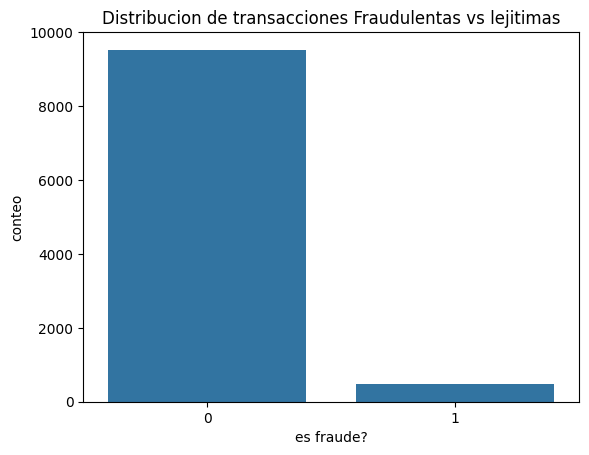

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.countplot(x='is_fraud',data=df)
plt.title("Distribucion de transacciones Fraudulentas vs lejitimas")
plt.xlabel("es fraude?")
plt.ylabel("conteo")
plt.show()

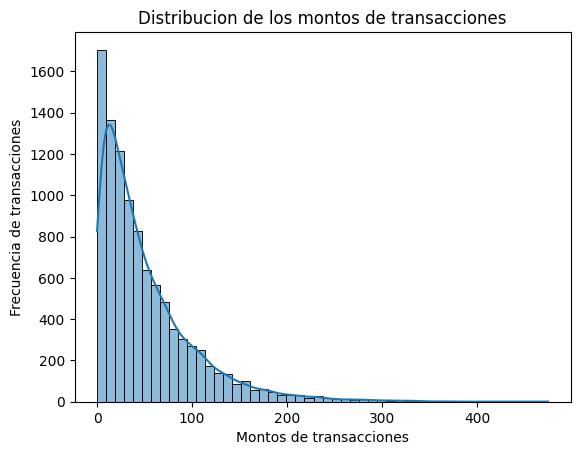

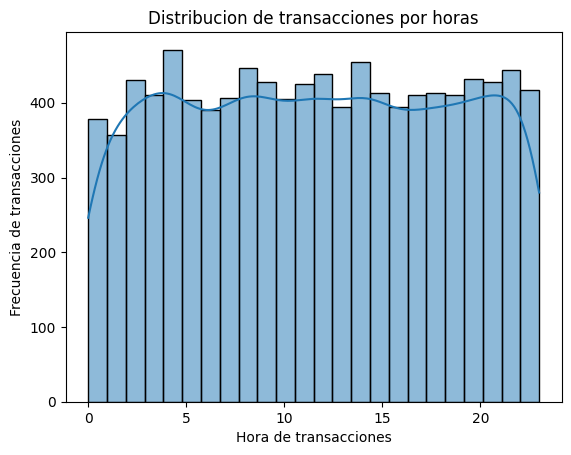

In [59]:
sns.histplot(df['amount'],bins=50,kde=True)
plt.title("Distribucion de los montos de transacciones")
plt.xlabel("Montos de transacciones")
plt.ylabel("Frecuencia de transacciones")
plt.show()

sns.histplot(df['hour'],bins=24,kde=True)
plt.title("Distribucion de transacciones por horas")
plt.xlabel("Hora de transacciones")
plt.ylabel("Frecuencia de transacciones")
plt.show()

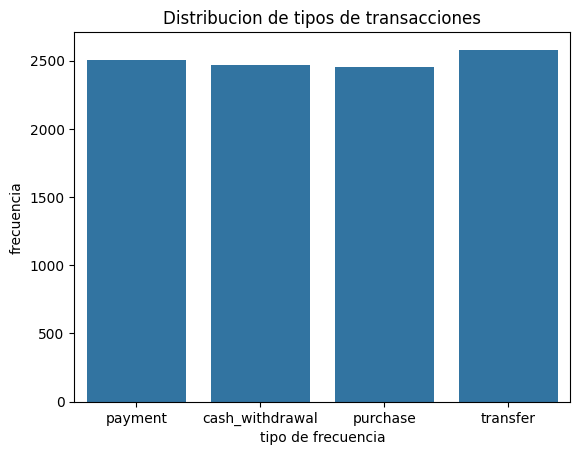

In [60]:
sns.countplot(x='transaction_type',data=df)
plt.title("Distribucion de tipos de transacciones")
plt.xlabel("tipo de frecuencia")
plt.ylabel("frecuencia")
plt.show()

#   Normalizacion

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['amount','account_age']]=scaler.fit_transform(df[['amount','account_age']])

print(df[['amount','account_age']].head())

     amount  account_age
0 -0.539576     1.352970
1 -0.601299     0.158588
2 -0.808025     1.666188
3 -0.082231     0.037829
4 -0.363614     0.022734


In [12]:
df=pd.get_dummies(df, columns=['transaction_type'],drop_first=True)
df.head()

,is_fraud,amount,hour,account_age,location_mismatch,previous_fraud_flag,transaction_type_payment,transaction_type_purchase,transaction_type_transfer
0,0,-0.539576,21,1.352970,0,0,True,False,False
1,1,-0.601299,1,0.158588,0,0,False,False,False
2,0,-0.808025,3,1.666188,0,0,False,False,False
3,0,-0.082231,12,0.037829,0,0,False,False,False
4,0,-0.363614,12,0.022734,0,0,False,False,False


In [ ]:
df['peak_hour']=df['hour'].apply(lambda x: 1 if 8<=x<=18 else 0)
print(df[['hour','peak_hour']].head())

   hour  peak_hour
0    21          0
1     1          0
2     3          0
3    12          1
4    12          1


In [14]:
df.head()
df.info()
print(df[['amount','account_age']].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   is_fraud                   10000 non-null  int64  
 1   amount                     10000 non-null  float64
 2   hour                       10000 non-null  int64  
 3   account_age                10000 non-null  float64
 4   location_mismatch          10000 non-null  int64  
 5   previous_fraud_flag        10000 non-null  int64  
 6   transaction_type_payment   10000 non-null  bool   
 7   transaction_type_purchase  10000 non-null  bool   
 8   transaction_type_transfer  10000 non-null  bool   
 9   peak_hour                  10000 non-null  int64  
dtypes: bool(3), float64(2), int64(5)
memory usage: 576.3 KB
             amount   account_age
count  1.000000e+04  1.000000e+04
mean   8.739676e-17 -1.740830e-17
std    1.000050e+00  1.000050e+00
min   -9.977037e-01 -1.

#   Entrenamiento del modelo

In [15]:
from sklearn.model_selection import train_test_split

X=df.drop('is_fraud',axis=1)
y=df['is_fraud']
X_train, y_train, X_test, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(f"Conjunto de entrenamiento: {X_train.shape}")

print(f"Conjunto de prueba: {X_test.shape}")

Conjunto de entrenamiento: (8000, 9)
Conjunto de prueba: (8000,)


In [77]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\juanb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix



X = df.drop('is_fraud', axis=1)
y = df['is_fraud']





X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


decision_tree = DecisionTreeClassifier(random_state=42)


decision_tree.fit(X_train, y_train)


y_pred_tree = decision_tree.predict(X_test)


print("Evaluación del Árbol de Decisión:")
print(classification_report(y_test, y_pred_tree))
print("Matriz de Confusión:")

print(confusion_matrix(y_test, y_pred_tree))



Evaluación del Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1905
           1       0.03      0.03      0.03        95

    accuracy                           0.90      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.91      0.90      0.90      2000

Matriz de Confusión:
[[1791  114]
 [  92    3]]


In [19]:
from sklearn.ensemble import RandomForestClassifier

random_forest=RandomForestClassifier(n_estimators=10,random_state=42)
random_forest.fit(X_train,y_train)
y_pred_rf=random_forest.predict(X_test)

print("Evaluacion del Random Forest")

print(classification_report(y_test,y_pred_rf))
print("Matrix de confusion")
print(confusion_matrix(y_test,y_pred_rf))

Evaluacion del Random Forest
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1905
           1       0.00      0.00      0.00        95

    accuracy                           0.95      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.91      0.95      0.93      2000

Matrix de confusion
[[1902    3]
 [  95    0]]


# sobre  muestreo usando SMOTE

In [52]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\juanb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [98]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=42)
x_train_res,y_train_res=smote.fit_resample(X_train,y_train)

print(f"Conjunto de entrenamiento resampleado: {x_train_res.shape}")

Conjunto de entrenamiento resampleado: (15242, 8)


In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

random_forest=RandomForestClassifier(class_weight='balanced',random_state=42)

random_forest.fit(x_train_res,y_train_res)

decision_tree=DecisionTreeClassifier(class_weight='balanced',random_state=42)

decision_tree.fit(x_train_res,y_train_res)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

3. Optimización de Hiperparámetros con GridSearchCV (para el Bosque Aleatorio)

In [100]:
from sklearn.model_selection import GridSearchCV

param_grid_rf={
    'n_estimators':[100,200,300,],
   'max_depth':[None,10,20,30],
   'min_samples_split':[2,5,10]}

grid_rf=GridSearchCV(random_forest,param_grid_rf,cv=3,scoring='roc_auc',n_jobs=-1)
grid_rf.fit(x_train_res,y_train_res)
print("Mejores hiperparametros encontradas",grid_rf.best_params_)
best_random_forest=grid_rf.best_estimator_

Mejores hiperparametros encontradas {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


In [106]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
y_pred_rf = best_random_forest.predict(X_test)

y_pred_prob_rf = best_random_forest.predict_proba(X_test)[:,1]

roc_auc_rf=roc_auc_score(y_test,y_pred_prob_rf)
print(f"roc_auc del bosque aleatorio optimizado :{roc_auc_rf:.4f}")

print("Evaluacion del Random Forest optimizado:")
print(classification_report(y_test,y_pred_rf))
print("matrix de confusion")
print(confusion_matrix(y_test,y_pred_rf))

roc_auc del bosque aleatorio optimizado :0.4749
Evaluacion del Random Forest optimizado:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1905
           1       0.05      0.11      0.06        95

    accuracy                           0.85      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.91      0.85      0.88      2000

matrix de confusion
[[1697  208]
 [  85   10]]


In [108]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

mse_rf=mean_squared_error(y_test,y_pred_rf)

mae_rf=mean_absolute_error(y_test,y_pred_rf)
r2=r2_score(y_test,y_pred_rf)
print(f"MSE: {mse_rf},MAE{mae_rf},R2: {r2}")

MSE: 0.1465,MAE0.1465,R2: -2.2380163005940052
